---------TAI DU LIEU

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [74]:
df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


------------HIEU DU LIEU

In [75]:
# 3. Kiem tra thong tin du lieu, dung ham info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [76]:
# 4. Mo ta du lieu, dung ham describe
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [77]:
# 5. Kiem tra kieu du lieu, dung types
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [78]:
# 6. Kiem tra ten cot dung columns
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [79]:
# 7. Kiem tra du lieu rong dung isnull().sum()
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [80]:
# 8. Kiem tra du lieu trung dung duplicated().sum()
df.duplicated().sum()

np.int64(0)

----------THAO TAC VOI DU LIEU HOAN CHINH

In [81]:
# 9. Doi ten cot phu hop ngu nghia
df.rename(columns= { 'Na_to_K' : 'Sodium_to_Potassium', 'BP' : 'Blood_Pressure'}, inplace= True)
df['Sex'].replace({'M' : 'Male', 'F': 'Female'}, inplace = True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype(int)

C:\Users\Student\AppData\Local\Temp\ipykernel_1332\4006278020.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M' : 'Male', 'F': 'Female'}, inplace = True)


In [82]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


---------KHAO SAT DU LIEU VOI KY THUAT EDA

In [83]:
# 10. Thong ke so luong nguoi thuoc 5 nhom tuoi cao nhat
age_values = df['Age'].value_counts()
top_age = age_values.head(5)
df_top_age = pd.DataFrame({'Age' : top_age.index , 'Count' : top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


C:\Users\Student\AppData\Local\Temp\ipykernel_1332\366225916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\Student\AppData\Local\Temp\ipykernel_1332\366225916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\Student\AppData\Local\Temp\ipykernel_1332\366225916.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\Student\AppData\Local\Temp\ipykernel_1332\366225916.py:6: FutureWarning: 

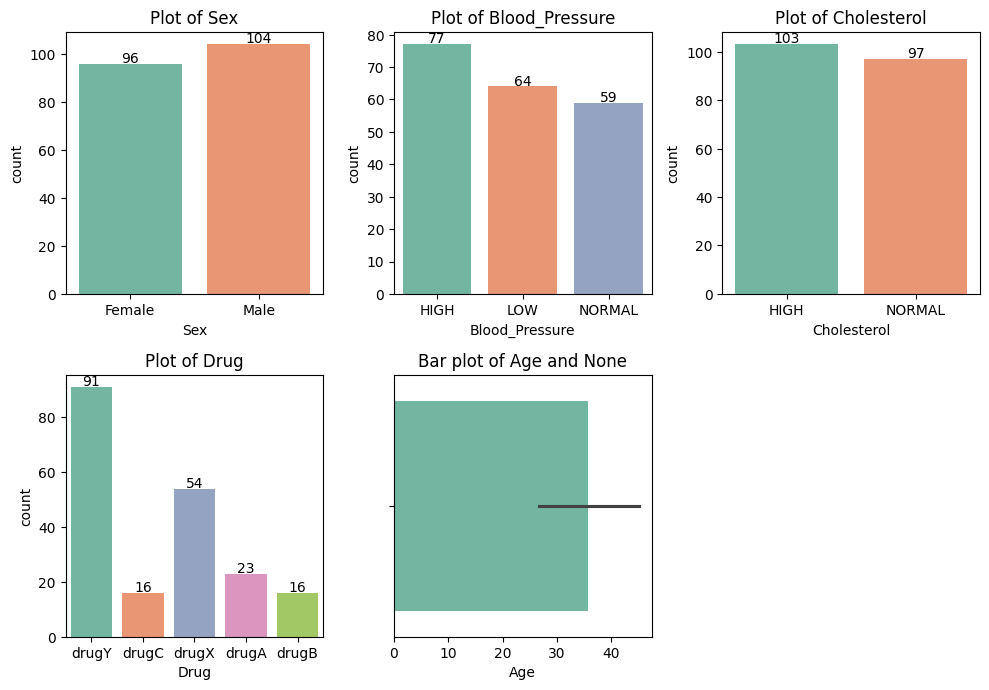

In [84]:
# 11. Tien hanh EDA du lieu. Sinh vien quan cac bieu do va cho nhan xet
# EDA

def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'):
    if plot_type == 'count':
        sns.countplot(x=x, data=data, palette=palette, ax=ax)
    elif plot_type == 'bar':
        sns.barplot(x=x, data=data, palette=palette, ax=ax)

    ax.set_title(f'Plot of {x}' if plot_type == 'count' else f'Bar plot of {x} and {y}')

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='baseline',
        fontsize=10, color='black',
        xytext=(0, 1),
        textcoords='offset points')
# Create the figure and subplots
plt.figure(figsize=(10, 10))

# Define plot configurations
plot_configs = [
    {'x': 'Sex', 'data' : df, 'plot_type' : 'count'},
    {'x': 'Blood_Pressure', 'data' : df, 'plot_type' : 'count'},
    {'x': 'Cholesterol', 'data' : df, 'plot_type' : 'count'},
    {'x': 'Drug', 'data' : df, 'plot_type' : 'count'},
    {'x': 'Age', 'data' : df_top_age, 'plot_type' : 'bar'},
]

# Loop through plot configurations to create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i+1)
    create_plot(ax, **config)

plt.tight_layout()
plt.show()

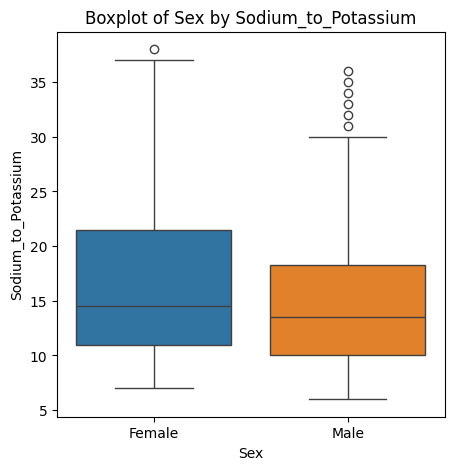

In [85]:
# 12. Tien hanh khao sat du lieu outlier va cho nhan xet
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex', y='Sodium_to_Potassium', data=df, hue='Sex')
plt.title("Boxplot of Sex by Sodium_to_Potassium")
plt.show()

--------------XAY DUNG MO HINH TRI TUE NHAN TAO

In [86]:
# 13. Tao tap du lieu dac trung (feature) va muc tieu (target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [87]:
# 14. Tien hanh One Hot Encoder cho dac trung Sex vaf Label Encoder cho cac categorical feature con lai. Sinh vien giai thich tai sao lam nhu vay
# OneHotEncoder
onehot_encoder_sex = OneHotEncoder(sparse_output=False)
one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
X = pd.concat([X, one_hot_df], axis=1)
X = X.drop('Sex', axis=1) # Drop the original categorical columns

# Labelled encoder
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_cholesterol = LabelEncoder()
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure'])
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])



In [88]:
# 15. Sinh vien phan tach thanh tap du lieu train va test voi ti le 60:40, he so ngay nhien la 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [89]:
# 16. Xây dựng mô hình với các hyperparameter tunning (siêu tham số điều chỉnh mô hình) như sau:
# criterion=”entropy”, max_depth=6 và lamx_leaf_nodes=10. Sinh viên giải thích các siêu tham số
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=6, min_samples_leaf=10)

In [90]:
# 17. Tiến hành huấn luyện (train) mô hình trên tập dữ liệu huấn luyện
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10)

In [91]:
# 18. Hien thi danh sach muc tieu phan lop
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

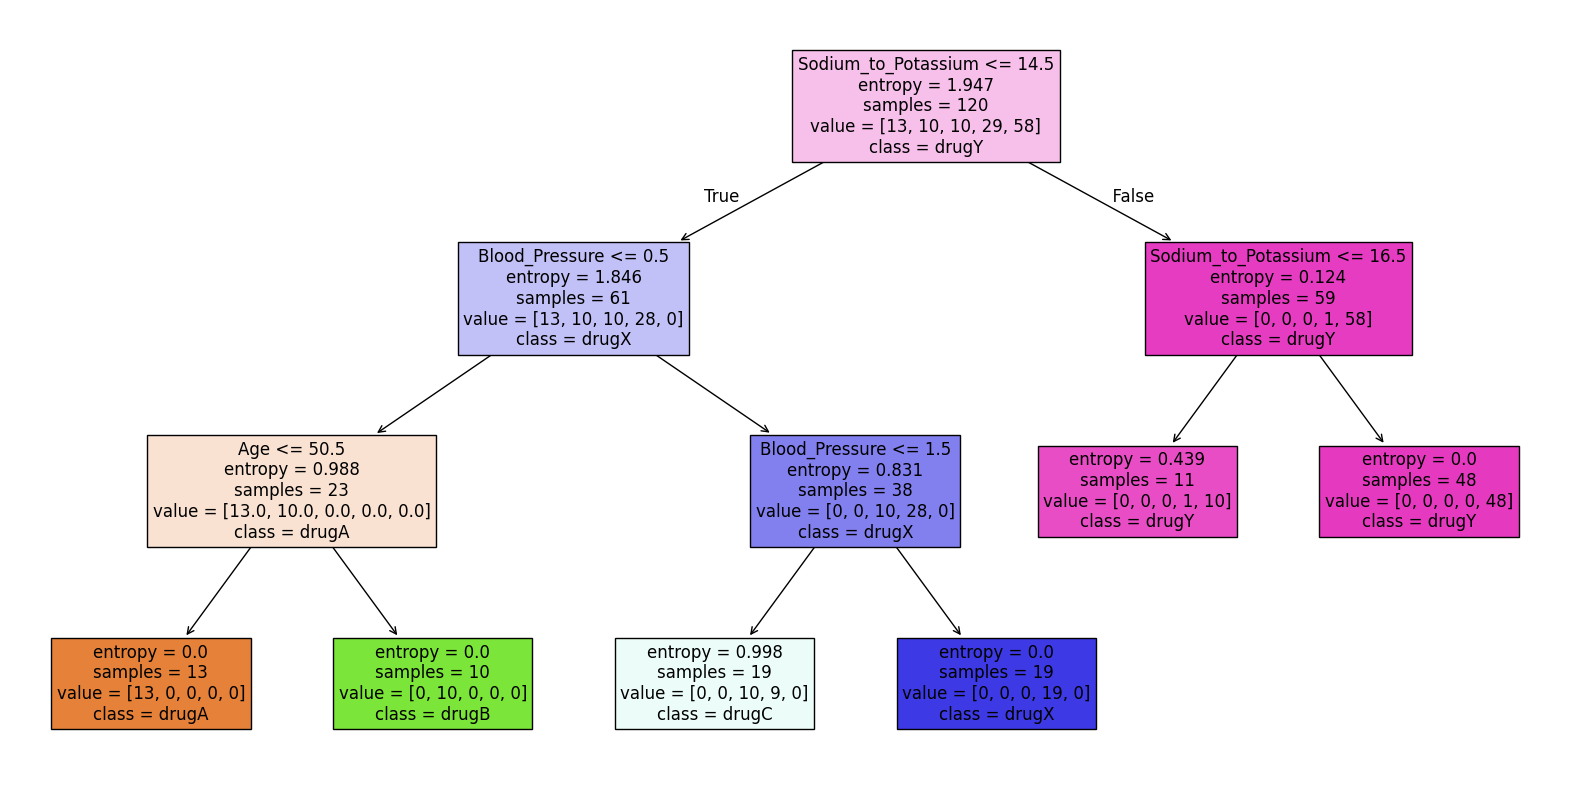

In [92]:
# 19. Vẽ sơ đồ mô hình cây phân lớp. Sinh viên giải thích các số liệu trên từng node và leaf

from sklearn.tree import plot_tree
feature_cols = X_train.columns

plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=feature_cols, class_names=dtc.classes_, fontsize = 12, filled = True)
plt.show()

In [93]:
# 20. Tinh Entroy co trong so (WE) va Information Gain khi phan tach Root thanh Left - Right node


---------------DANH GIA MO HINH

In [94]:
# 21. Sinh viên tiến hành đánh giá dựa trên các độ đo

# a. Accuracy
# Predict the response for test dataset
y_test_pred = dtc.predict(X_test)

#Model accuracy, how often is the calssifier correct
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))

Accuracy 0.9


In [95]:
# b. Confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  8, 17,  0],
       [ 0,  0,  0,  0, 33]])

In [96]:
# 22. In ra bảng báo cáo các giá trị đánh giá theo từng nhóm thuốc phân lớp
from sklearn.metrics import classification_report
target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       0.43      1.00      0.60         6
       drugX       1.00      0.68      0.81        25
       drugY       1.00      1.00      1.00        33

    accuracy                           0.90        80
   macro avg       0.89      0.94      0.88        80
weighted avg       0.96      0.90      0.91        80



---------------XÂY DỰNG ỨNG DỤNG TRÍ TUỆ NHÂN TẠO

In [98]:
#Prediction

labelled_encoder_Age = LabelEncoder()
labelled_encoder_Sodium_to_Potassium = LabelEncoder()
X['Sodium_to_Potassium'] = labelled_encoder_blood_pressure.fit_transform(X['Sodium_to_Potassium'])
X['Age'] = labelled_encoder_cholesterol.fit_transform(X['Age'])

Age = 32
age_scaled = labelled_encoder_Age.transform([Age])

Blood_Pressure = 'HIGH'
blood_scaled = labelled_encoder_blood_pressure.transform([Blood_Pressure])

Cholesterol = 'NORMAL'
cholesterol_scaled = labelled_encoder_cholesterol.transform([Cholesterol])

Sodium_to_Potassium = 13
so_to_po_scaled = labelled_encoder_Sodium_to_Potassium.transform([Sodium_to_Potassium])

Sex = 'Female'
sex_scaled = onehot_encoder_sex.transform([[Sex]])

feature_sample = np.array([sex_scaled[0], blood_scaled[0], cholesterol_scaled[0], so_to_po_scaled[0], age_scaled[0]])

y_sample_pred = dtc.predict([feature_sample])
y_sample_pred

NotFittedError: This LabelEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

--------------------TOI UU VA CAI TIEN MO HINH CO DIEU KIEN

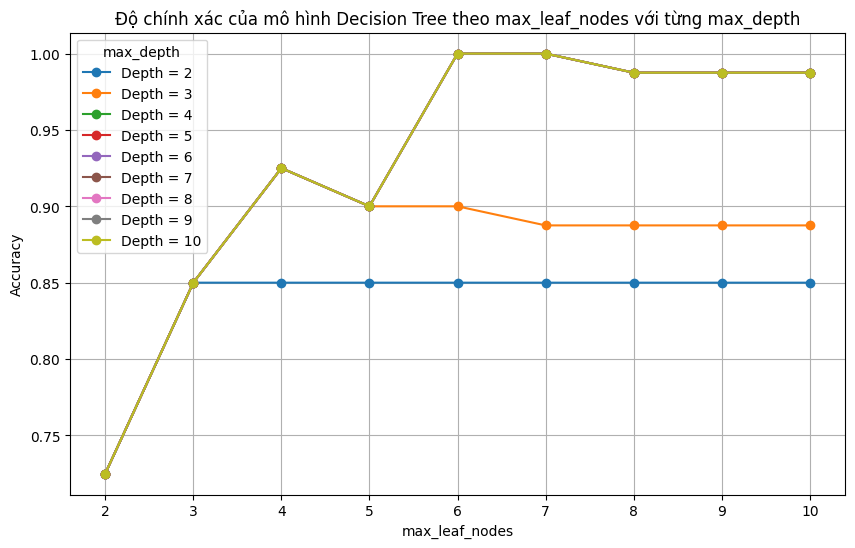

In [71]:
# 24. Sinh viên điều chỉnh các siêu tham số trong mô hình như sau: max_depth chạy từ 2 đến 10 và
# max_leaf_nodes chạy từ 2 đến 10. Sau đó, vẽ biểu đồ thể hiện sự thay đổi của độ đo accuracy. Từ
# đó đưa đến kết luận với siêu tham số điều chỉnh nào thì mô hình tốt nhất.

# Khởi tạo mảng để lưu độ chính xác
max_depth_values = np.arange(2, 11)  # max_depth từ 2 đến 10
max_leaf_nodes_values = np.arange(2, 11)  # max_leaf_nodes từ 2 đến 10
accuracy_matrix = np.zeros((len(max_depth_values), len(max_leaf_nodes_values)))

# Lặp qua tất cả các giá trị của max_depth và max_leaf_nodes
for i, max_depth in enumerate(max_depth_values):
    for j, max_leaf_nodes in enumerate(max_leaf_nodes_values):
        # Khởi tạo mô hình cây quyết định với các siêu tham số
        clf = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
        
        # Huấn luyện mô hình
        clf.fit(X_train, y_train)
        
        # Dự đoán trên tập kiểm tra và tính toán độ chính xác
        y_pred = clf.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)
        
        # Lưu độ chính xác vào ma trận
        accuracy_matrix[i, j] = accuracy

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))

# Vẽ độ chính xác theo từng max_depth cố định và thay đổi max_leaf_nodes
for i, max_depth in enumerate(max_depth_values):
    plt.plot(max_leaf_nodes_values, accuracy_matrix[i, :], marker='o', label=f'Depth = {max_depth}')

# Thêm các chi tiết cho biểu đồ
plt.title('Độ chính xác của mô hình Decision Tree theo max_leaf_nodes với từng max_depth')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.legend(title='max_depth')
plt.grid(True)

# Hiển thị biểu đồ
plt.show()

#Mo hinh tot nhat voi max_depth = 10 và max_leaf_node = 6 hoặc 7